In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_to_load = "Resources/mouse_metadata.csv"
study_results_to_load = "Resources/study_results.csv"

# Read the mouse data and the study results
#mouse_metadata_to_load = pd.read_csv(mouse_metadata_path)
#study_results_to_load = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_metadata = pd.read_csv(mouse_metadata_to_load)
study_results = pd.read_csv(study_results_to_load)

# Combine the data into a single dataset
study_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# check to see if there are duplicats

study_data['Mouse ID'].value_counts().head()

g989    13
x402    10
m550    10
x401    10
q787    10
Name: Mouse ID, dtype: int64

In [4]:
# There are duplicates, so check g989 to see if it is listed for more than one drug
mice_data = study_data.set_index('Mouse ID')
mouse = mice_data.loc['g989', :]
mouse.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26


In [5]:
# Delete the extra data (cleaning!)

clean_data_mice = mice_data.drop(index = 'g989')
clean_study_data = clean_data_mice.reset_index()
clean_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Check for duplicate mice

dupe_mice = study_data.groupby('Mouse ID')

# Count how many times duplicate mice appear

count_mice = dupe_mice['Mouse ID'].count()

count_mice

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Mouse ID, Length: 249, dtype: int64

In [7]:
# Calculate mean

# Create dataframe to store the Mean Tumor Volume Data Grouped by Drug
tumor_response_mean_df = pd.DataFrame(clean_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean())
tumor_response_mean_df = tumor_response_mean_df.reset_index()
# Preview DataFrame
tumor_response_mean_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565


In [8]:
# rename
tumor_response_mean_df = tumor_response_mean_df.rename(columns={'Tumor Volume (mm3)': 'Mean'})

In [9]:
# Calculate Standard Error
tumor_response_error_df = pd.DataFrame(clean_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem())
tumor_response_error_df = tumor_response_error_df.reset_index()
# Preview DataFrame
tumor_response_error_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,0.329346
1,Ceftamin,0.469821
2,Infubinol,0.492236
3,Ketapril,0.603860
4,Naftisol,0.596466


In [10]:
# rename SEM

tumor_response_error_df = tumor_response_error_df.rename(columns={'Tumor Volume (mm3)': 'SEM'})

In [11]:
# Calculate the variance

# Create dataframe to store the variance Tumor Volume Data Grouped by Drug
tumor_response_var_df = pd.DataFrame(clean_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var())
tumor_response_var_df = tumor_response_var_df.reset_index()
# Preview DataFrame
tumor_response_var_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,24.947764
1,Ceftamin,39.290177
2,Infubinol,43.128684
3,Ketapril,68.553577
4,Naftisol,66.173479


In [12]:
# Rename

tumor_response_var_df = tumor_response_var_df.rename(columns={'Tumor Volume (mm3)': 'Variance'})

In [13]:
# Calculate the median

# Create dataframe to store the variance Tumor Volume Data Grouped by Drug
tumor_response_med_df = pd.DataFrame(clean_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median())
tumor_response_med_df = tumor_response_med_df.reset_index()
# Preview DataFrame
tumor_response_med_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,41.557809
1,Ceftamin,51.776157
2,Infubinol,51.820584
3,Ketapril,53.698743
4,Naftisol,52.509285


In [14]:
# Rename median

tumor_response_med_df = tumor_response_med_df.rename(columns={'Tumor Volume (mm3)': 'Median'})

In [15]:
# Create summary table with what we have so far to check work.


pd.merge(tumor_response_error_df, tumor_response_mean_df, on ='Drug Regimen')

,Drug Regimen,SEM,Mean
0,Capomulin,0.329346,40.675741
1,Ceftamin,0.469821,52.591172
2,Infubinol,0.492236,52.884795
3,Ketapril,0.603860,55.235638
4,Naftisol,0.596466,54.331565
5,Placebo,0.581331,54.033581
6,Propriva,0.544332,52.320930
7,Ramicane,0.320955,40.216745
8,Stelasyn,0.573111,54.233149
9,Zoniferol,0.516398,53.236507


In [16]:
# Let's try another way
merge_data_sort = clean_study_data.sort_values(["Tumor Volume (mm3)"], ascending=True)

merge_data_sort.head()
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Identify the diferrent Drug Regimen along with the total tumer volume for each using .groupby
regimen_grouped = merge_data_sort.groupby(["Drug Regimen"])
regimen_grouped

#create a variable to capture the total tumor volume for each regimen
#tumor_volume = regimen_grouped["Tumor Volume (mm3)"].sum()

#create computation for the mean of each regimen
regimen_mean = regimen_grouped["Tumor Volume (mm3)"].mean()

#Create computation for the median of each regimen
regimen_median = regimen_grouped["Tumor Volume (mm3)"].median()

#Create computation for the variance of each regimen
regimen_variance = regimen_grouped["Tumor Volume (mm3)"].var()

#create computation for the standard deviation of each regimen
regimen_std = regimen_grouped["Tumor Volume (mm3)"].std()

#create computation for the SEM
regimen_sem = regimen_grouped["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Print original data to visualize

clean_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


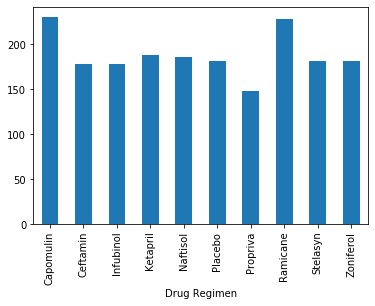

In [18]:
# Use Pandas Library to develop first bar plot.
drug_rows = clean_study_data.groupby('Drug Regimen').count()['Mouse ID']

drug_rows.plot(kind='bar')

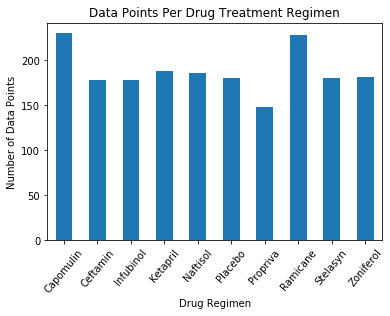

In [19]:
# Add labels and title

datapts2 = clean_study_data.groupby('Drug Regimen').count()['Tumor Volume (mm3)']

forpanbar = pd.DataFrame(datapts2)

#add labels
also = forpanbar.plot.bar(legend=False,rot=50)
also
plt.ylabel("Number of Data Points")
plt.title("Data Points Per Drug Treatment Regimen")
plt.savefig('barplot1')



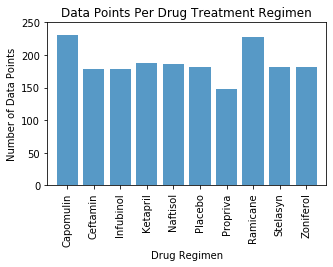

In [20]:
# Use Matplot library to do the same thing

x_axis = np.arange(len(datapts2))

tick_locations = [x for x in x_axis]
#for x in x_axis:
#tick_locations.append(x)

plt.figure(figsize=(5,3))
#plt.bar(x_axis, rain_df["Inches"], color='r', alpha=0.5, align="center")
#plt.xticks(tick_locations, rain_df["State"], rotation="vertical")

newtry = forpanbar.reset_index()
newtry

plt.bar(x_axis, forpanbar['Tumor Volume (mm3)'], alpha=0.75, align="center")
plt.xticks(tick_locations, newtry['Drug Regimen'],rotation="vertical")

plt.xlim(-0.75, len(datapts2)-.25)
plt.ylim(0, 250)

plt.title("Data Points Per Drug Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.savefig('barplot2')
plt.show()

/Users/kathrynharris/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


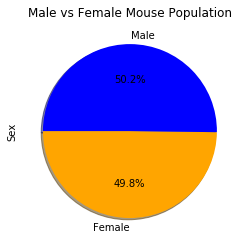

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

bygender = mouse_metadata.groupby("Sex").count()

#bygender = mouse_metadata["Sex"].value_count()
bygender

# The colors of each section of the pie chart
colors = ["orange", "blue"]

labels = [mouse_metadata['Sex'].unique()]
newlist = list(bygender.index)
newlist

sizes = [bygender["Mouse ID"]]
sizes

plt.pie(sizes, labels=newlist, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')

plt.savefig('piechart1')
plt.show()

([<matplotlib.patches.Wedge at 0x7fa0d1297c10>,
 [Text(0.03308201408261561, 1.0995024239828841, ''),
  Text(-0.0330820140826155, -1.0995024239828841, '')])

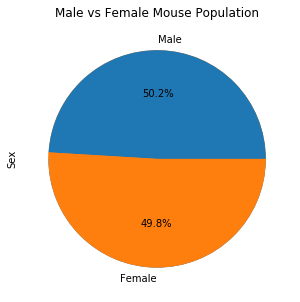

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender = clean_study_data.groupby('Sex').count()['Mouse ID']

secondpie = bygender["Mouse ID"].plot.pie(y='sizes', figsize=(5, 5), autopct="%1.1f%%",startangle=180)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')


plt.pie(mouse_gender)

In [23]:
clean_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [24]:
# Individualize the different regimens

cap_df = clean_study_data.loc[clean_study_data['Drug Regimen'] == 'Capomulin', :]
ram_df = clean_study_data.loc[clean_study_data['Drug Regimen'] == 'Ramicane', :]
inf_df = clean_study_data.loc[clean_study_data['Drug Regimen'] == 'Infubinol', :]
ceft_df = clean_study_data.loc[clean_study_data['Drug Regimen'] == 'Ceftamin', :]
cap_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [25]:
caplast = cap_df.groupby('Mouse ID').max()['Timepoint']
caplastvol = pd.DataFrame(caplast)
caplastmerge = pd.merge(caplastvol, study_data, on=("Mouse ID","Timepoint"),how="left")
caplastmerge.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [26]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Quantitatively determine capomulin outliers
# treatments - Capomulin, Ramicane, Infubinol, and Ceftamin

tumors = caplastmerge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [27]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Extract the top 4 regimenes from the data frame in order to perform IQR test on each
best_regimes = clean_study_data[clean_study_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
best_regimes

best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,0,45.000000
1600,Ceftamin,x226,0,45.000000
1475,Ceftamin,x581,0,45.000000
1465,Ceftamin,a275,0,45.000000
1455,Ceftamin,k210,0,45.000000
...,...,...,...,...
1811,Capomulin,g316,45,40.159220
1464,Ceftamin,k210,45,68.923185
460,Ramicane,j913,45,31.560470
1484,Ceftamin,x581,45,64.634949


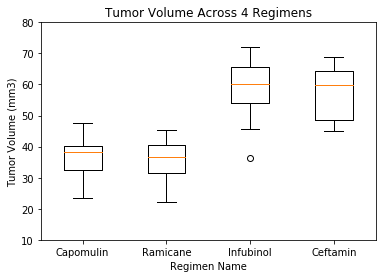

In [28]:
# Create a box and whisker plot based on thid data

best_regimens_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort.head()

# Turn retrieved data into dataframe to easily manipulate
best_regimen_df = best_regimens_sort.to_frame()
best_regimen_df

#Create a list to use as labels and dataframe
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = best_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)

# Set title and axes
plt.xlabel('Regimen Name')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume Across 4 Regimens')

plt.show()

In [33]:
# Create line plots and scatter plots

forline_df = cap_df.loc[cap_df["Mouse ID"] == "l509",:]
forline_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1708,l509,0,45.000000,0,Capomulin,Male,17,21
1709,l509,5,45.851193,0,Capomulin,Male,17,21
1710,l509,10,46.759074,0,Capomulin,Male,17,21
1711,l509,15,47.488599,1,Capomulin,Male,17,21
1712,l509,20,48.070452,2,Capomulin,Male,17,21


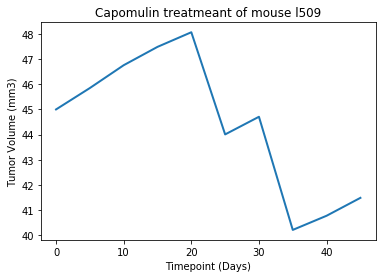

In [34]:

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

x_axisTP = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

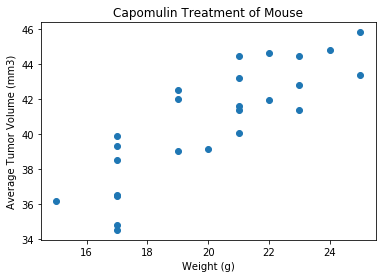

In [37]:
# Set capavg variable and plot scatterplot

capavg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse')

plt.savefig('scatterplot')
plt.show()

In [38]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [39]:
model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [40]:
#capavg['Weight (g)']
mslope = model.slope
bintercept = model.intercept

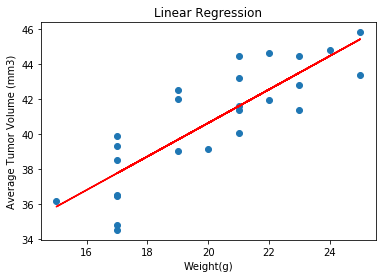

In [41]:
y_values = capavg['Weight (g)']*mslope+bintercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Linear Regression')

plt.savefig('linearregression')
plt.show()